# AEGAN datasets benchmark

In [47]:
import pandas as pd
import os 
import sys
sys.path.append('/disk1/ariane/vscode/enzyme-tk/enzymetk/')
from steps.sequence_search_blast import BLAST
from steps.save_step import Save

# Basically want to run blast on each of the datasets and see how many get the correct active site
# We do this filtering first to remove them from the sequence set
data_dir = '/disk1/ariane/vscode/squidly/aegan_structures/AEGAN_extracted_sequences/'
files = os.listdir(data_dir)
swissprot = pd.read_csv('swissprot.tsv', sep='\t') 

def annotate_residue_from_uniprot(df):
    # Organise the active sites of these guys to be better
    active_sites = []
    active_site_residue_counts = []
    x = 0
    for act_site in df['Active site'].values:
        sites = []
        if isinstance(act_site, str):
            act_site = act_site.replace(" ", '')
            for act in act_site.split('ACT_SITE'):
                try:
                    sites.append(int(act.split(';')[0].replace(" ", '')) - 1) # Need to subtract 1 to make it fit with the fact that python is 0 encoded lol
                except:
                    x = 1
        if len(sites) != 0:
            active_sites.append('|'.join([str(s) for s in sites]))
            active_site_residue_counts.append(len(sites))
        else:
            active_sites.append('None')
            active_site_residue_counts.append(0)
    df['Residue'] = active_sites
    df['active_site_residue_counts'] = active_site_residue_counts
    return df
    
swissprot = annotate_residue_from_uniprot(swissprot)
swissprot = swissprot[swissprot['active_site_residue_counts'] > 0]
training_ids = set(pd.read_csv('AEGAN_real_training_set.txt', header=None)[0].values)
swissprot = swissprot[swissprot['Entry'].isin(training_ids)]
for f in files:
    try:
        df = pd.read_csv(f'{data_dir}{f}/{f}.tsv', sep='\t')
        entries = set(list(df['Entry'].values))
        # Remove from SwissProt
        # Now we're going to save this as a fasta file 
        fasta_label = f'AEGAN_with_active_site_seqs_{f}.fasta'
        with open(fasta_label, 'w+') as fout:
            for entry, seq in swissprot[['Entry', 'Sequence']].values:
                if entry not in entries:
                    fout.write(f'>{entry}\n{seq}\n')
        # Do blast on this dataset 
        # This should be where you downloaded the data from zotero, there is a folder in there called AS_inference
        # This contains the models and the data needed to run the tool
        id_col = 'Entry'
        seq_col = 'Sequence'
        df << (BLAST(id_col, seq_col, database=fasta_label, args=['--ultra-sensitive']) >> Save(f'blast/{f}_BLAST.pkl'))
    except:
        print(f)

diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: AEGAN_with_active_site_seqs_PC.fasta
Opening the database file...  [0.002s]
Loading sequences...  [0.016s]
Masking sequences...  [0.031s]
Writing sequences...  [0.002s]
Hashing sequences...  [0.001s]
Loading sequences...  [0s]
Writing trailer...  [0.005s]
Closing the input file...  [0s]
Closing the database file...  [0s]

Database sequences  9870
  Database letters  4032426
     Database hash  129885c69cb938b471437545d84ffcb5
        Total time  0.059000s
diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and update

         0       1     2    3    4   5   6    7    8    9              10  \
0    P00492  P00493  96.8  218    7   0   1  218    1  218  4.890000e-156   
1    P00492  P20035  49.3  213  104   3   9  218   17  228   6.560000e-68   
2    P00492  Q26997  41.3  208  118   3  13  217   23  229   3.710000e-51   
3    P00492  P51900  31.5  184  113   4  30  211    8  180   8.960000e-24   
4    P00492  Q07010  29.9  147   97   1  62  208   47  187   1.310000e-21   
..      ...     ...   ...  ...  ...  ..  ..  ...  ...  ...            ...   
558  Q00511  P04670  34.9  301  184   7   8  302   15  309   6.560000e-45   
559  Q00511  P16163  32.3  328  174   8   9  302   39  352   1.810000e-44   
560  Q00511  P16164  33.8  299  178   6   9  302   21  304   2.820000e-41   
561  Q00511  Q45697  26.7  315  194  10   9  298  181  483   1.130000e-18   
562  Q00511  O32141  26.1  322  192   9   9  301  177  481   4.660000e-15   

        11  
0    429.0  
1    206.0  
2    164.0  
3     92.0  
4     87.0

 [0.004s]
Database: /tmp/tmpjiyh1jtd/LUh5oYRV2Q_db (type: Diamond database, sequences: 9851, letters: 4024611)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file...  [0s]
Loading query sequences...  [0s]
Masking queries...  [0.02s]
Algorithm: Double-indexed
Building query histograms...  [0.106s]
Seeking in database...  [0s]
Loading reference sequences...  [0.006s]
Masking reference...  [0.025s]
Initializing temporary storage...  [0.001s]
Building reference histograms...  [0.154s]
Allocating buffers...  [0.094s]
Processing query block 1, reference block 1/1, shape 1/64.
Building reference seed array...  [0.105s]
Building query seed array...  [0.084s]
Computing hash join...  [0.021s]
Masking low complexity seeds...  [0.021s]
Searching alignments...  [0.028s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 2/64.
Building reference seed array...  [0.029s]
Building query seed array...  [0.064s]
Computing hash join...  [0.02s]
Mas

          0       1     2    3    4   5   6    7   8    9              10  \
0     O46427  Q3T0I2  88.7  335   38   0   1  335   1  335  8.050000e-234   
1     O46427  P07711  40.5  306  164   9  38  331  32  331   2.620000e-74   
2     O46427  Q24940  40.1  302  170   6  38  332  24  321   1.700000e-73   
3     O46427  Q9FJ47  41.7  319  159  13  31  331  35  344   3.030000e-70   
4     O46427  Q9JI81  37.6  330  190   8  14  331   6  331   8.270000e-70   
...      ...     ...   ...  ...  ...  ..  ..  ...  ..  ...            ...   
1015  Q9ZHI0  B3E8F8  48.3  671  335   9   4  665  14  681  7.320000e-193   
1016  Q9ZHI0  B5YIF8  47.0  670  339   8   4  662   6  670  1.920000e-192   
1017  Q9ZHI0  B9KXM2  48.0  679  338   8   5  670  15  691  2.450000e-191   
1018  Q9ZHI0  A9BJX5  45.5  662  350   9   4  658   5  662  3.280000e-190   
1019  Q9ZHI0  Q0AAV2  48.3  666  331   8   9  665  11  672  5.460000e-190   

         11  
0     635.0  
1     231.0  
2     228.0  
3     221.0  
4    

diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: AEGAN_with_active_site_seqs_EF_superfamily.fasta
Opening the database file...  [0.002s]
Loading sequences...  [0.016s]
Masking sequences...  [0.027s]
Writing sequences...  [0.002s]
Hashing sequences...  [0.001s]
Loading sequences...  [0s]
Writing trailer...  [0.004s]
Closing the input file...  [0s]
Closing the database file...  [0s]

Database sequences  9845
  Database letters  4022770
     Database hash  3ef89e39f1ec5dbfe5fa1bd0357056d3
        Total time  0.054000s
diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, suppor

          0       1     2    3    4   5    6    7   8    9             10  \
0     O15496  P14423  42.9  112   62   1   55  164  35  146  1.060000e-33   
1     O15496  Q9NZK7  42.7  110   60   2   57  164  34  142  3.050000e-32   
2     O15496  P81236  41.0  105   60   1   44  146   2  106  5.820000e-30   
3     O15496  Q9WVF6  40.2  112   65   1   55  164  33  144  1.660000e-29   
4     O15496  Q90ZZ9  43.0  107   56   3   60  164  35  138  1.990000e-29   
...      ...     ...   ...  ...  ...  ..  ...  ...  ..  ...           ...   
1308  Q9UKM7  P32906  38.9  501  238  17  253  695  42  532  2.320000e-94   
1309  Q9UKM7  Q9SXC9  31.8  484  263  14  245  695  29  478  5.510000e-60   
1310  Q9UKM7  Q9FG93  34.1  461  255  17  253  695  44  473  7.950000e-53   
1311  Q9UKM7  Q5BF93  28.2  483  303  14  249  698  33  504  2.060000e-50   
1312  Q9UKM7  P38888  29.4  489  287  22  248  698  35  503  8.780000e-33   

         11  
0     114.0  
1     110.0  
2     104.0  
3     103.0  
4    

Algorithm: Double-indexed
Building query histograms...  [0.106s]
Seeking in database...  [0s]
Loading reference sequences...  [0.006s]
Masking reference...  [0.025s]
Initializing temporary storage...  [0.001s]
Building reference histograms...  [0.119s]
Allocating buffers...  [0.084s]
Processing query block 1, reference block 1/1, shape 1/64.
Building reference seed array...  [0.098s]
Building query seed array...  [0.066s]
Computing hash join...  [0.016s]
Masking low complexity seeds...  [0.016s]
Searching alignments...  [0.024s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 2/64.
Building reference seed array...  [0.024s]
Building query seed array...  [0.048s]
Computing hash join...  [0.016s]
Masking low complexity seeds...  [0.016s]
Searching alignments...  [0.019s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 3/64.
Building reference seed array...  [0.064s]
Building query seed array...  [0.048s]
Computing hash j

         0           1     2    3    4   5    6     7    8    9   \
0    O29238  A0A0L0P6P7  22.8  509  322  17  607  1049  113  616   
1    O29238      Q81IH1  22.9  638  362  25  507  1054    4  601   
2    O29238      Q5WAX6  24.7  477  287  16  626  1035  100  571   
3    O29238      Q8T2T7  23.5  507  292  19  616  1036  103  599   
4    O29238      Q49ZH2  19.6  516  325  17  606  1048   77  575   
..      ...         ...   ...  ...  ...  ..  ...   ...  ...  ...   
891  Q9Z4J7      Q4W6G0  36.6  623  311  20   11   596    5  580   
892  Q9Z4J7      Q9AF95  38.1  559  282  22   50   586   41  557   
893  Q9Z4J7      O05542  34.9  608  336  18   17   593   17  595   
894  Q9Z4J7      P12293  33.2  615  355  16   20   612   14  594   
895  Q9Z4J7      P05465  24.1  664  338  26   55   594  169  790   

                10     11  
0     1.660000e-17   85.9  
1     9.490000e-14   73.9  
2     6.740000e-11   64.7  
3     2.140000e-10   63.2  
4     6.370000e-06   48.5  
..             

Algorithm: Double-indexed
Building query histograms...  [0.106s]
Seeking in database...  [0s]
Loading reference sequences...  [0.006s]
Masking reference...  [0.026s]
Initializing temporary storage...  [0.001s]
Building reference histograms...  [0.119s]
Allocating buffers...  [0.084s]
Processing query block 1, reference block 1/1, shape 1/64.
Building reference seed array...  [0.096s]
Building query seed array...  [0.065s]
Computing hash join...  [0.016s]
Masking low complexity seeds...  [0.016s]
Searching alignments...  [0.027s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 2/64.
Building reference seed array...  [0.023s]
Building query seed array...  [0.048s]
Computing hash join...  [0.016s]
Masking low complexity seeds...  [0.016s]
Searching alignments...  [0.021s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 3/64.
Building reference seed array...  [0.064s]
Building query seed array...  [0.048s]
Computing hash j

          0       1     2    3    4   5   6    7    8    9              10  \
0     O15530  Q12701  40.2  507  236  15  74  542   91  568  2.130000e-100   
1     O15530  Q9XF67  37.7  477  251  10  81  542   43  488   1.150000e-91   
2     O15530  Q9Y7J6  48.8  293  138   3  77  363   50  336   9.580000e-89   
3     O15530  Q5A3P6  50.7  292  127   4  81  361  239  524   1.070000e-87   
4     O15530  Q54TW2  31.7  619  270   8  75  542   62  678   1.840000e-86   
...      ...     ...   ...  ...  ...  ..  ..  ...  ...  ...            ...   
1842  Q9Z4J7  Q4W6G0  36.6  623  311  20  11  596    5  580  2.000000e-106   
1843  Q9Z4J7  Q9AF95  38.1  559  282  22  50  586   41  557  2.160000e-100   
1844  Q9Z4J7  O05542  34.9  608  336  18  17  593   17  595   1.420000e-99   
1845  Q9Z4J7  P12293  33.2  615  355  16  20  612   14  594   3.540000e-90   
1846  Q9Z4J7  P05465  24.1  664  338  26  55  594  169  790   4.660000e-28   

         11  
0     314.0  
1     288.0  
2     282.0  
3     2

Algorithm: Double-indexed
Building query histograms...  [0.107s]
Seeking in database...  [0s]
Loading reference sequences...  [0.006s]
Masking reference...  [0.024s]
Initializing temporary storage...  [0.001s]
Building reference histograms...  [0.121s]
Allocating buffers...  [0.084s]
Processing query block 1, reference block 1/1, shape 1/64.
Building reference seed array...  [0.104s]
Building query seed array...  [0.066s]
Computing hash join...  [0.016s]
Masking low complexity seeds...  [0.016s]
Searching alignments...  [0.026s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 2/64.
Building reference seed array...  [0.023s]
Building query seed array...  [0.047s]
Computing hash join...  [0.016s]
Masking low complexity seeds...  [0.016s]
Searching alignments...  [0.02s]
Deallocating memory...  [0s]
Processing query block 1, reference block 1/1, shape 3/64.
Building reference seed array...  [0.025s]
Building query seed array...  [0.048s]
Computing hash jo

          0       1     2    3    4   5   6    7    8    9              10  \
0     O31168  P33912  38.4  281  164   5   1  278    1  275   7.500000e-64   
1     O31168  P22862  40.5  264  153   3  16  278   12  272   1.940000e-63   
2     O31168  P25026  37.5  285  160   8   1  276    1  276   5.870000e-55   
3     O31168  P47229  24.1  291  185  11   3  276   12  283   2.770000e-14   
4     O31168  Q988D4  25.3  257  160  10  14  258   22  258   1.200000e-08   
...      ...     ...   ...  ...  ...  ..  ..  ...  ...  ...            ...   
1224  Q9SWE5  P30197  31.0  168   95   8  21  180    4  158   1.910000e-16   
1225  Q9UM07  Q9Z183  73.0  667  175   2   1  663    1  666   0.000000e+00   
1226  Q9UM07  Q9ULC6  57.0  669  276   6   1  663    1  663  4.970000e-271   
1227  Q9ZBA9  P15555  27.3  330  207  11   5  313   38  355   7.820000e-17   
1228  Q9ZBA9  P83111  33.0  109   65   3  13  113  115  223   1.170000e-05   

          11  
0      200.0  
1      199.0  
2      177.0  
3  

 [0.06s]
Deallocating reference...  [0s]
Loading reference sequences...  [0s]
Deallocating buffers...  [0s]
Deallocating queries...  [0s]
Loading query sequences...  [0s]
Closing the input file...  [0s]
Closing the output file...  [0s]
Closing the database...  [0s]
Cleaning up...  [0s]
Total time = 10.907s
Reported 1229 pairwise alignments, 1229 HSPs.
132 queries aligned.


In [44]:
files = os.listdir('blast')
results = {}
for f in files:
    try:
        label = f.split('_BLAST.pkl')[0]
        df = pd.read_csv(f'{data_dir}{label}/{label}.tsv', sep='\t')
        entries = set(list(df['Entry'].values))
        blast_df = pd.read_pickle(f'blast/{f}')
        blast_df = blast_df.sort_values(by='sequence identity', ascending=False)
        blast_df.drop_duplicates('query', inplace=True)
        # Then join up with all df
        blast_df.set_index('query', inplace=True)
        df.set_index('Entry', inplace=True)
        df = df.join(blast_df, how='left')
        results[f] = df
        uniprot_id_to_seq = dict(zip(swissprot.Entry, swissprot.Sequence))
        for name, seq, uniprot in df[['From', 'Sequence', 'target']].values:
            fin = f'msa/{uniprot}_{name}.fa'
            with open(fin, 'w+') as fout:
                fout.write(f'>{uniprot}\n{uniprot_id_to_seq.get(uniprot)}\n')
                fout.write(f'>{name}\n{seq}')
            # Now run clustalomega
            os.system(f'clustalo --force -i {fin} -o {fin.replace(".fa", ".msa")}')
    except:
        print(f)

EF_family_BLAST.csv
PC_BLAST.csv
EF_fold_BLAST.csv
HA_superfamily_BLAST.csv
NN_BLAST.csv
EF_superfamily_BLAST.csv
Squidly_BLAST.pkl


In [45]:
swissprot['active_site_residue_counts'].value_counts()

1    5480
2    2751
3    1375
4     255
6      18
5       8
8       1
Name: active_site_residue_counts, dtype: int64

P00817 Q9LXC9 Y V
P09373 A0A031WDE4 E S
P0AC88 P93031 S T
P26440 G3KIM8 E A
26
EF_family_BLAST.pkl 71 11 26 0.6844135802469135
P00817 Q9LXC9 Y V
P07987 Q99034 S -
P08839 P77439 H -
P08839 P77439 H -
P22830 Q9V9S8 N D
P26440 G3KIM8 E A
47
EF_family_BLAST.pkl 92 13 47 0.6288377192982457
P00817 Q9LXC9 Y V
P09373 A0A031WDE4 E S
P0AC88 P93031 S T
10
EF_family_BLAST.pkl 38 7 10 0.7272727272727273
P00817 Q9LXC9 Y V
P22983 P77439 H T
P22983 P77439 H -
P26440 G3KIM8 E A
21
EF_family_BLAST.pkl 60 12 21 0.6917562724014337
O80323 O80324 Q E
P0A6D3 P9WPY5 E D
P22983 P77439 H T
P22983 P77439 H -
28
EF_family_BLAST.pkl 86 9 28 0.7242547425474254
P08839 P77439 H -
P08839 P77439 H -
P09373 A0A031WDE4 E S
P0A6D3 P9WPY5 E D
P22983 P77439 H T
P22983 P77439 H -
44
EF_family_BLAST.pkl 136 16 44 0.7304421768707483


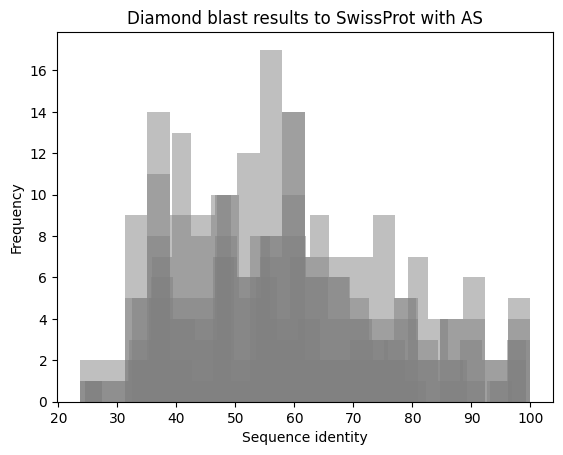

In [46]:
from Bio import AlignIO
import matplotlib.pyplot as plt
import numpy as np
swissprot = pd.read_csv('swissprot.tsv', sep='\t') 

def annotate_residue_from_uniprot(df):
    # Organise the active sites of these guys to be better
    active_sites = []
    active_site_residue_counts = []
    x = 0
    for act_site in df['Active site'].values:
        sites = []
        if isinstance(act_site, str):
            act_site = act_site.replace(" ", '')
            for act in act_site.split('ACT_SITE'):
                try:
                    sites.append(int(act.split(';')[0].replace(" ", '')) - 1) # Need to subtract 1 to make it fit with the fact that python is 0 encoded lol
                except:
                    x = 1
        if len(sites) != 0:
            active_sites.append('|'.join([str(s) for s in sites]))
            active_site_residue_counts.append(len(sites))
        else:
            active_sites.append('None')
            active_site_residue_counts.append(0)
    df['Residue'] = active_sites
    df['active_site_residue_counts'] = active_site_residue_counts
    return df
    
swissprot = annotate_residue_from_uniprot(swissprot)
uniprot_id_to_active_site = dict(zip(swissprot['Entry'], swissprot['Residue']))
for label in results:
    df = results[label]
    predicted_active_sites = {}
    missing = 0
    for query, uniprot in df[['From', 'target']].values:
        try:
            fin = f'msa/{uniprot}_{query}.msa'
            # Read with bioseq
            # Read the alignment
            active_sites = [int(x) for x in uniprot_id_to_active_site.get(uniprot).split('|')]
            alignment = AlignIO.read(fin, 'fasta')
            # get the existing one and then calculate the position gapped
            records = {}
            for record in alignment:
                records[record.id] = record.seq
            # Now get the active site
            position_count = 0
            active_pred = []
            query_seq = records[query]
            query_count = 0
            for i, v in enumerate(records[uniprot]):
                if position_count in active_sites:
                    if query_count < len(query_seq.replace('-', '')):
                        active_pred.append(query_count)
                    if query_seq[i] != v:
                        print(query, uniprot, v, query_seq[i])
                if v != '-':
                    position_count += 1
                if query_seq[i] != '-' and query_seq[i] != ' ':
                    query_count += 1
        
            predicted_active_sites[query] = '|'.join([str(s) for s in active_pred])
            # Now we can just add on the
        except:
            missing += 1
    print(missing)
    df['BLAST_residues'] = [predicted_active_sites.get(label) for label in df['From'].values]
    df['True_residues'] = [uniprot_id_to_active_site.get(label) for label in df['From'].values]
    df.to_csv(f'blast/{label.replace(".pkl", ".csv")}')
    # Check the agreement:
    agree, disagree, none_ = 0, 0, 0
    percent_aggree = []
    to_check = []
    for seq_label, res_sq, res_blast in df[['From', 'True_residues', 'BLAST_residues']].values:
        if not res_sq:
            print(seq_label, res_sq, res_blast)
        else:
            if res_sq != res_blast:
                to_check.append(seq_label)
                if not res_blast:
                    none_ += 1
                    percent_aggree.append(0)
                else:
                    # Check the % agree 
                    res_sq = res_sq.split('|')
                    res_blast = res_blast.split('|')
                    percent_aggree.append(len(set(res_sq) & set(res_blast))/max(len(res_sq), len(res_blast)))
                    disagree += 1
            else:
                percent_aggree.append(1)
                agree += 1
    print(f, agree, disagree, none_, np.mean(percent_aggree))

    plt.hist(df['sequence identity'].values, bins=20, color='grey', alpha=0.5)
    plt.title('Diamond blast results to SwissProt with AS')
    plt.ylabel('Frequency')
    plt.xlabel('Sequence identity')
    plt.savefig(f'Figures/DiamondBlast_histogram_{f}.svg')

In [37]:
swissprot[swissprot['Entry'] == 'O46427']

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Sequence,Fragment,Active site,Binding site,EC number,Cofactor,Residue,active_site_residue_counts


In [22]:
label

'NN_BLAST.pkl'